In [1]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR

# read and load the csv data file
filename = "Dataset/myClassDataSet2.csv"
data_df = read_csv (filename)

In [2]:
data_df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,class
0,-1.160092,-0.359014,0.672250,-0.298393,-0.940342,0.973444,1.152316,1.268438,1.666694,-0.797019,0
1,-1.065337,0.949971,0.775982,-0.436214,0.642434,-0.808253,1.060199,-0.055959,0.213937,-2.429849,0
2,0.860180,-0.100933,-1.322137,1.063376,-0.411552,-1.806852,-0.864811,-1.303068,-0.296465,-0.622150,1
3,-0.894969,0.568466,1.961494,-1.705388,-0.319602,0.306074,0.907182,0.203818,-0.285203,-1.200104,0
4,-0.703499,3.091785,0.669167,-0.448310,0.826840,0.774514,0.702085,-2.426947,-0.596632,0.945176,0


In [3]:
Y = data_df.values[:,-1]
X = data_df.values[:,0:-1]

In [4]:
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2)
# ‘liblinear’
lr = LogisticRegression(solver='liblinear').fit(X, Y)
lr.score(X, Y)

0.9413

In [5]:
cross_val_score(lr, X, Y, scoring='accuracy')

array([0.935 , 0.939 , 0.9345, 0.947 , 0.948 ])

In [6]:
cross_val_score(lr, X, Y, scoring='neg_log_loss')

array([-0.21247216, -0.20914712, -0.21209848, -0.17752616, -0.17444354])

In [7]:
cross_val_score(lr, X, Y, scoring='roc_auc')

array([0.96033983, 0.96107954, 0.96344535, 0.97613378, 0.9769255 ])

In [8]:
kf = KFold(n_splits=10, shuffle=True, random_state=7)
lda = LinearDiscriminantAnalysis().fit(X, Y)
lda.score(X,Y)

0.9323

In [9]:
lr = LogisticRegression(solver='liblinear').fit(X, Y)
lr.score(X, Y)

0.9413

In [10]:
neigh = KNeighborsClassifier().fit(X, Y)
neigh.score(X, Y)

0.9519

In [11]:
gnb = GaussianNB().fit(X, Y)
gnb.score(X, Y)

0.9416

In [12]:
from sklearn.svm import SVC
svc = SVC().fit(X, Y)
svc.score(X, Y)

0.9486

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

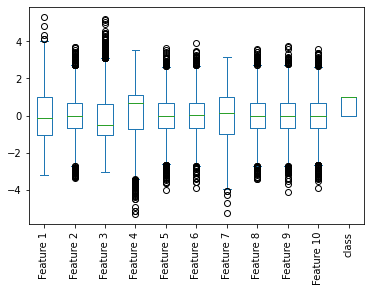

In [14]:
data_df.plot(kind='box')
plt.xticks(rotation = 90)
plt.show()

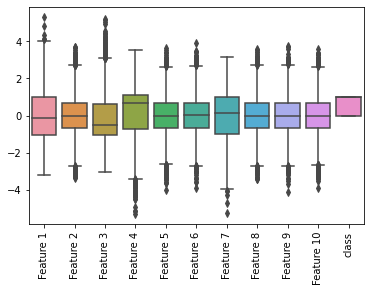

In [15]:
sns.boxplot(data=data_df)
#sns.swarmplot(data=data_df)
plt.xticks(rotation = 90)
plt.show()

In [16]:
import pandas as pd

data = [lda.score(X,Y), lr.score(X, Y), neigh.score(X, Y), gnb.score(X, Y), svc.score(X, Y)]

df = pd.DataFrame(data)
df

,0
0,0.9323
1,0.9413
2,0.9519
3,0.9416
4,0.9486


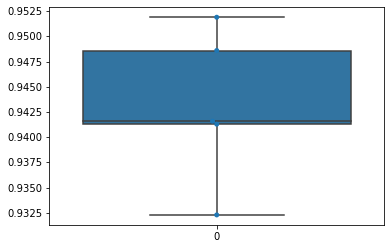

In [19]:
sns.boxplot(data=df)
sns.swarmplot(data=df)
#df.plot(kind='box')
plt.show()